In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn
from matplotlib.pyplot import figure


from amm import *


In [2]:
def simulate_split(x_amm, y_amm, x_order, y_order, pieces):    
    # rendering
    ticks_per_side = 1000
    
    x_per_tick = x_order/ticks_per_side
    y_per_tick = y_order/ticks_per_side
    
    ticks_per_piece = ticks_per_side/pieces
    
    amm = AMM(x_amm, y_amm)
    
    on_x = True
    ticks_on_side = 0
    
    res = []
    
    for tick in range(ticks_per_side * 2):
        # Switch sides if required
        if ticks_on_side > ticks_per_piece:
            on_x = not on_x
            ticks_on_side = 0
        
        if on_x:
            amm.trade(x_per_tick,0)
        else:
            amm.trade(0,y_per_tick)
        
        ticks_on_side += 1
    
        res.append(amm.y_reserves)
    return res

def simulate_infinite_split(x_amm, y_amm, x_order, y_order):    
    # rendering
    ticks_per_side = 1000
    
  
    amm = AMM(x_amm, y_amm)
    
    res = []
    
    for tick in range(ticks_per_side * 2):
        amm.infinitesimal_trade(x_order/ticks_per_side/2, y_order/ticks_per_side/2)
    
        res.append(amm.y_reserves)
    return res

cols = {}

for pieces in [1,2,10]:
    cols[f'{pieces} pieces per order'] = simulate_split(2000,1,100,100,pieces)
cols['infinite pieces per order'] =  simulate_infinite_split(2000,1,100,100)
    
df = pd.DataFrame(cols)
df = df.set_index(df.index/max(df.index)*100,drop=True)

Text(0.5, 1.0, 'ETH in AMM Over Time for Different Order Splitting Regimes (Extreme Case)')

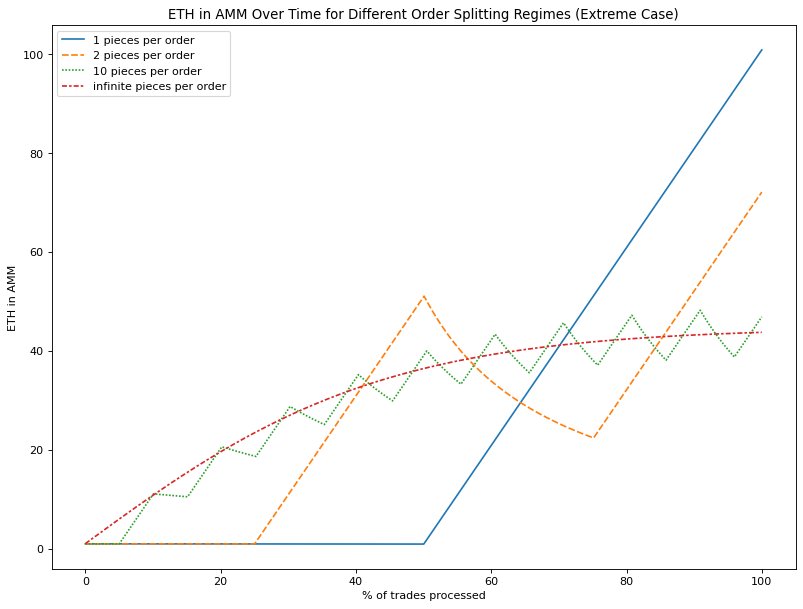

In [4]:
figure(figsize=(12, 9), dpi=80)
ax=sbn.lineplot(data=df)
ax.set_ylabel("ETH in AMM")
ax.set_xlabel("% of trades processed")
ax.set_title("ETH in AMM Over Time for Different Order Splitting Regimes (Extreme Case)")
